<a href="https://colab.research.google.com/github/shmilyface/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Autism_Diagnosis_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Initial Data Exploration for Autism Screening Test

In [0]:
'''
Import and Creation of DataFrame

To Do:
- remove used_app, jaundice, age_desc, relation
- Missing Values
- DTypes

'''

import pandas as pd

columns = ['patient', 'sounds', 'big_picture', 'multitask', 'interrupt', 'social_comp', 'bored', 'reading_int', 'hyperfocus', 'read_faces',
           'intentions', 'age', 'gender', 'ethnicity', 'jaundice', 'family_autism', 'country', 'used_app', 'result', 'age_desc', 'relation', 'class/asd']

df = pd.read_csv('https://raw.githubusercontent.com/shmilyface/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/csv_result-Autism-Adult-Data.csv', header=0, names=columns)

##Column Removal##

#tidy up into a function later
df.drop(['jaundice', 'used_app', 'age_desc', 'relation', 'ethnicity'], axis=1, inplace=True)

df.head()


,patient,sounds,big_picture,multitask,interrupt,social_comp,bored,reading_int,hyperfocus,read_faces,intentions,age,gender,family_autism,country,result,class/asd
0,1,1,1,1,1,0,0,1,1,0,0,26,f,no,United States,6,NO
1,2,1,1,0,1,0,0,0,1,0,1,24,m,yes,Brazil,5,NO
2,3,1,1,0,1,1,0,1,1,1,1,27,m,yes,Spain,8,YES
3,4,1,1,0,1,0,0,1,1,0,1,35,f,yes,United States,6,NO
4,5,1,0,0,0,0,0,0,1,0,0,40,f,no,Egypt,2,NO


In [0]:
##DTYPES##

'''
✓ age = object. Change to int64
✓ gender = binary
✓ ethnicity = numeric values
✓ family_autism = binary
✓ country = numeric
✓ class/asd = binary
'''
#function to make dtypes numeric
def to_num(col):
  print(col, ':', df[col].unique())
  df[col] = df[col].replace(df[col].unique(), range(len(df[col].unique())))

df = df.replace('?', float('nan'))
df.age.fillna(method='ffill', inplace=True)
df.age = [int(r.age) for r in df.itertuples()] # for int64 goodness
df.age.replace(383, 38, inplace=True) # typo in data
to_num('gender')
to_num('family_autism')
to_num('country')
to_num('class/asd')
print()
df.dtypes

gender : ['f' 'm']
family_autism : ['no' 'yes']
country : ['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 'Iceland' 'Nicaragua'
 'Hong Kong' 'Japan' 'Ukraine' 'Kazakhstan' 'AmericanSamoa' 'Uruguay'
 'Serbia' 'Portugal' 'Malaysia' 'Ecuador' 'Niger' 'Belgium' 'Bolivia'
 'Aruba' 'Finland' 'Turkey' 'Nepal' 'Indonesia' 'Angola' 'Azerbaijan'
 'Iraq' 'Czech Republic' 'Cyprus']
class/asd : ['NO' 'YES']



patient          int64
sounds           int64
big_picture      int64
multitask        int64
interrupt        int64
social_comp      int64
bored            int64
reading_int      int64
hyperfocus       int64
read_faces       int64
intentions       int64
age              int64
gender           int64
family_autism    int64
country          int64
result           int64
class/asd        int64
dtype: object

In [0]:
# Misc Info

print('Age:', df.age.min(), df.age.max())
print('Countries:', len(df.country.unique()))

Age: 17 64
Countries: 67


In [0]:
# df2 - a tidier version for visualizations

#difference in data before/after tidying

meta = ['patient', 'age', 'gender', 'family_autism',
        'country', 'result', 'class/asd']
questions = ['sounds', 'big_picture', 'multitask', 'interrupt', 'social_comp',
             'bored', 'reading_int', 'hyperfocus', 'read_faces', 'intentions']
df2 = pd.melt(df, id_vars=meta, value_vars=questions,
              var_name='question', value_name='response')
df2['question'] = df2['question'].replace(
    df2['question'].unique(), range(len(df2['question'].unique())))
df2.head()

,patient,age,gender,family_autism,country,result,class/asd,question,response
0,1,26,0,0,0,6,0,0,1
1,2,24,1,1,1,5,0,0,1
2,3,27,1,1,2,8,1,0,1
3,4,35,0,1,0,6,0,0,1
4,5,40,0,0,3,2,0,0,1


In [0]:
# Gender - f/0 & m/1
import numpy as np
import matplotlib.pyplot as plt

#colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
#ax = (result.div(result.sum(1), axis=0)).plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
#plt.legend(labels=result.columns,fontsize= 14)
#plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

# Add this loop to add the annotations
#for p in ax.patches:
#    width, height = p.get_width(), p.get_height()
#    x, y = p.get_xy() 
#    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
    
def bar_char2(title, legend, btms, tops, ticks, size=[12,8], col='green'):
  ind = np.arange(len(ticks))
  plt.figure(figsize=size)
  p1 = plt.bar(ind, btms, 0.5, color=col)
  for p in p1.patches:
    w, h = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate('{:.0%}'.format(h), [x + 0.15, y + h + 0.03])
  p2 = plt.bar(ind, tops, 0.5, bottom=btms, color='whitesmoke')
  plt.title(title)
  plt.legend([p1[0], p2[0]], legend)
  plt.xticks(ind, ticks, rotation='vertical')
  plt.yticks([])
  for spine in plt.gca().spines.values():
    spine.set_visible(False)
  plt.show()



In [0]:
'''
Initial Visualization/Observations
'''
import seaborn as sns

#sns.pairplot(df) #lol that was the least helpful four dot pairplot ever

#Immediate question: What was the criteria for autism prior to this one? 
'''
Data published 2018
**What is the prevalence of this data?
**How does it compare to national average

For Reference: 
1943 - Leo Kanner "infantile autism"
1966 - 1 in 2500 based on Kanners desc
>>what was his criteria - Schizophrenia

Acquire ratios for every year from 1980 to 2019 and map
the trends between each new test implementation strategy

1980 - DSM - 6 criteria, 0 or 1 (Anything prior to this was schizophrenia)
1987 - New edition/ Expanded Diagnosis 8 of 16 criteria
1 in 1400
1991 - Diagnosis = Special Education Access Act
1994 - Inclusion of Aspergers
2013 - prior to release of this new edition in 2013, a diagnosis 
of autism was not given if the child also had ADHD

'''

#sns.pairplot(df2);

http://www.unstrange.com/dsm1.html

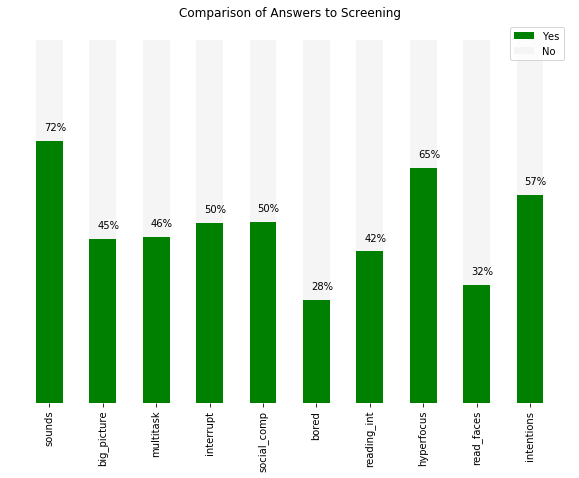

In [65]:
#df function to compare results of questions with other columns of interest

def bar_char(title, df, col='green'):
  yes_s = [df[q].value_counts()[1] / len(df[q]) for q in questions]
  no_s = [1 - p for p in yes_s]
  bar_char2(
      title, ['Yes', 'No'],
      yes_s, no_s, questions, [10, 7], col)

#Initial Observations

'''
sound most common attribute
hyperfocus next
intentions
interrupt
social comp
big_picture
multitask
'''

bar_char('Comparison of Answers to Screening',df)

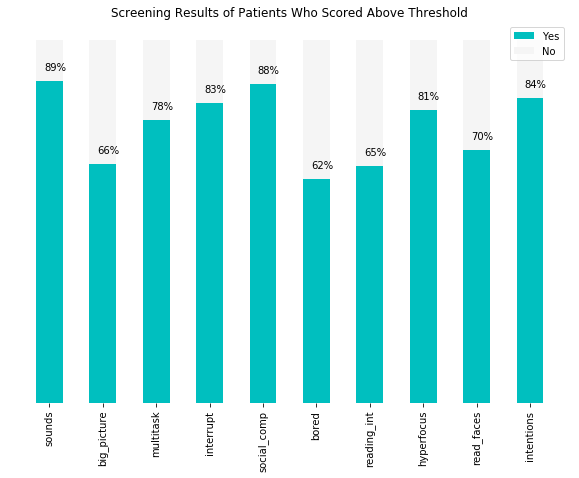

In [67]:


#plot the patients who have above threshold #'s, compare with those who don't 

bar_char('Screening Results of Patients Who Scored Above Threshold', df[df['result'] >= 6], 'c')

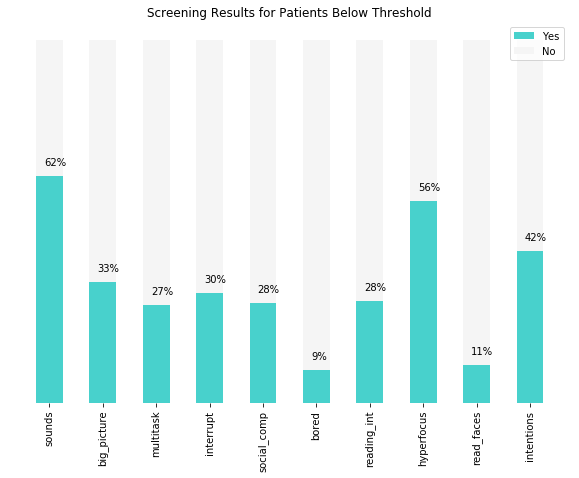

In [68]:
#Result less than diagnostic threshold


bar_char('Screening Results for Patients Below Threshold',df[df['result'] < 6], 'mediumturquoise')

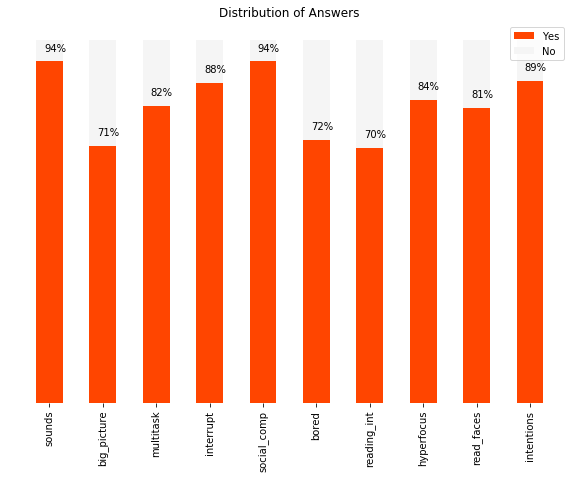

In [0]:
#then compare that with a Class/ASD 

'''
Observations:

'''

bar_char('Comparison of Screening Results w/ formal ASD Diagnosis')df[df['class/asd'] ==1], 'orangered') 

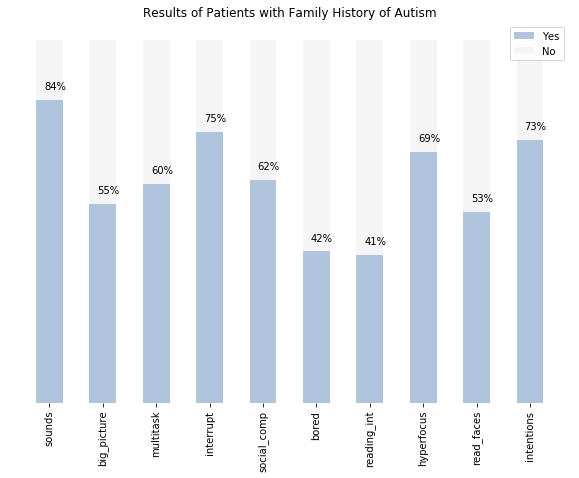

'\nObservations:\n\n'

In [72]:
#compare with family_autism

bar_char('Results of Patients with Family History of Autism', df[df['family_autism'] ==1], 'lightsteelblue'); 

'''
Observations:

'''

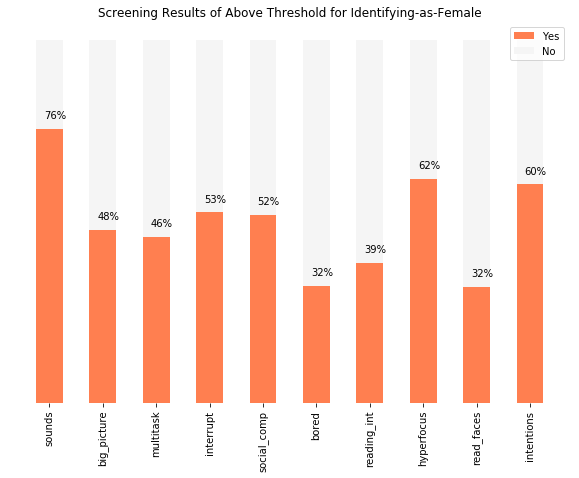

None


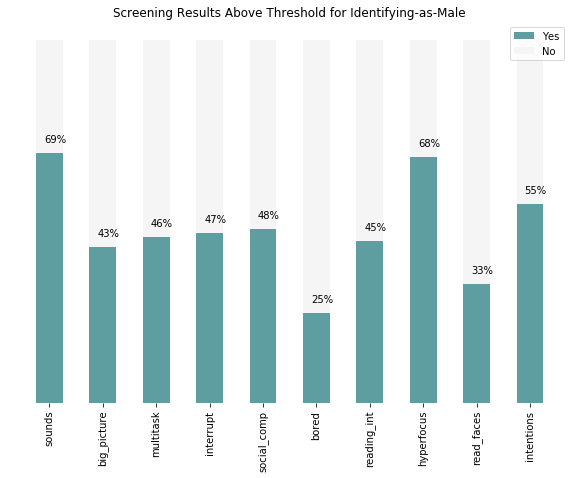

None


In [71]:
#compare diagnosis rates for men and women, are there comparisons between total scores, diagnosis, and gender?
#put in same graph


#female/responses
print(bar_char('Screening Results of Above Threshold for Identifying-as-Female', df[df['gender'] ==0], 'coral'));
#male/responses
print(bar_char('Screening Results Above Threshold for Identifying-as-Male', df[df['gender'] ==1], 'cadetblue') );

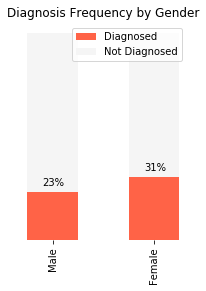

In [64]:
#gender versus class/asd

df_m = df2[df2.gender == 1]
df_f = df2[df2.gender == 0]

df_m_no = df_m[df_m['class/asd'] == 0]
df_f_no = df_f[df_f['class/asd'] == 0]
df_m_yes = df_m[df_m['class/asd'] == 1]
df_f_yes = df_f[df_f['class/asd'] == 1]

bar_char2(
    'Diagnosis Frequency by Gender', ['Diagnosed', 'Not Diagnosed'],
    [ df_m_yes.shape[0] / df_m.shape[0], df_f_yes.shape[0] / df_f.shape[0] ],
    [ df_m_no.shape[0] / df_m.shape[0], df_f_no.shape[0] / df_f.shape[0] ],
    ['Male', 'Female'], [3,4], 'tomato'
)

Create a paragraph here about findings in the visualizations. Narrow down for story mode once we have all information settled. 

-What trends are we seeing

-gender has an impact

-results varied based on gender

-What surprised me

more women were diagnosed via the app, with a higher rate than men in this study. In comparison, current statistics show men are much more likely to hava autism. 

-missed diagnosis at younger age due to gender bias

-

-What questions does it raise

-how many males took the survey
-how many women took the survey
-ages of men and women
-comparison to NIMH data for autism




##Part Two: Past DSM criteria

In [0]:
#create a df for the different diagnostics over time back to 1980s

In [0]:
#compare the different diagnostic criteria using DSM
#how do we run the patient answers to the screenings, using only the information we have? 
#how can I calculate the probabilty of a patient being diagnosed with autism based on current information, 
#and previous criteria. We do have historic ratios as DSM's were released, to measure the diagnostics, if that helps. 

#create visualizations to show DSM criteria, as well as the ratio. (Timeline Visualization w/ graph showing ratio increase)